In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import numpy as np

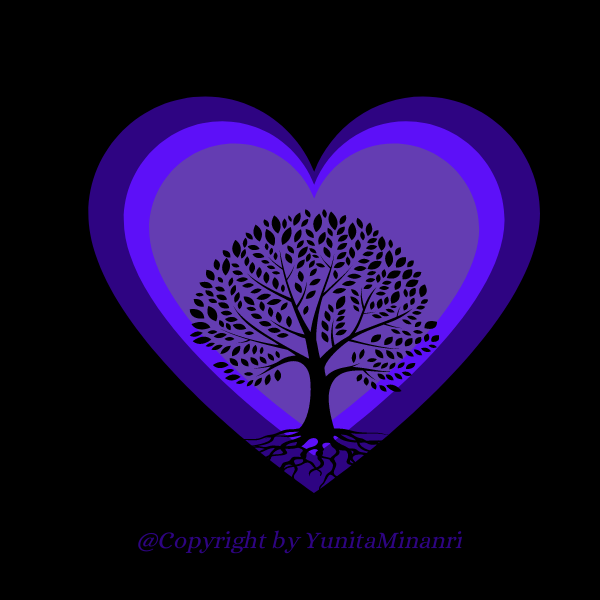

In [ ]:
# reading the image
img = cv2.imread('/content/format.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
img.shape

(600, 600, 4)

In [ ]:
# preprocessing
rows, cols = img.shape[0], img.shape[1]
img = img.reshape(rows * cols, 4)

In [ ]:
print(img.shape)
print(img[:5])

(360000, 4)
[[  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]
 [  0   0   0 255]]


In [ ]:
# modelling
kMeans = KMeans(n_clusters = 10)
kMeans.fit(img)

KMeans(n_clusters=10)

In [ ]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[  0,   0,   0, 255],
       [177,  60,  99, 255],
       [130,   4,  46, 255],
       [247,  16,  92, 255],
       [ 56,  11,  26, 255],
       [139,  47,  78, 255],
       [ 93,   2,  32, 255],
       [199,  15,  76, 255],
       [ 95,  32,  53, 255],
       [ 27,   3,  11, 255]], dtype=uint8)

In [ ]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(360000,)
(600, 600)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# reconstructing
newImg = np.zeros((rows, cols, 4), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImg[i, j, :] = centers[labels[i, j], :]
cv2.imwrite('compressedformat.png', newImg);

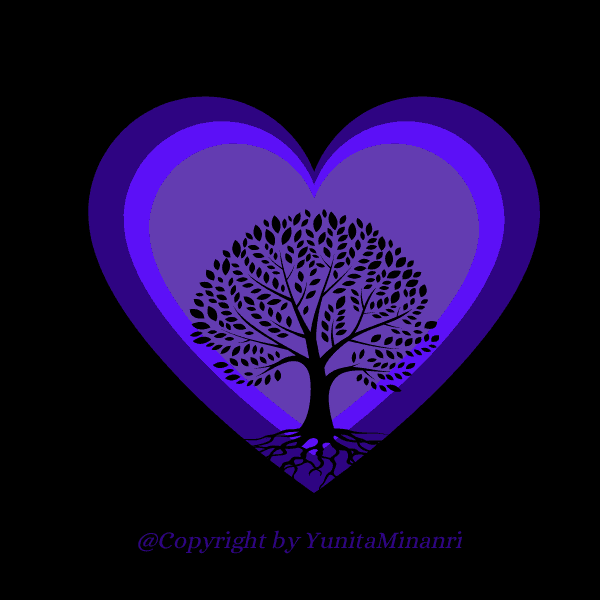

In [ ]:
cv2_imshow(newImg)